# Linear algebra
Linear algebra is the branch of mathematics that deals with **vector spaces**. 

In [1]:
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce

# Vectors

Vectors are points in some finite-dimensional space. 

In [19]:
v = [1, 2]
w = [2, 1]
vectors = [v, w]

In [2]:
def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

In [3]:
vector_add(v, w)

[3, 3]

In [5]:
def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

vector_subtract(v, w)

[-1, 1]

In [7]:
def vector_sum(vectors):
    return reduce(vector_add, vectors)

In [20]:
vector_sum(vectors)

[3, 3]

In [2]:
def scalar_multiply(c, v):
    # c is a number, v is a vector
    return [c * v_i for v_i in v]

In [13]:
scalar_multiply(2.5, v)

[2.5, 5.0]

In [14]:
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


In [21]:
vector_mean(vectors)

[1.5, 1.5]

In [4]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))


In [18]:
dot(v, w)

4

The dot product measures how far the vector v extends in the w direction. 
- For example, if w = [1, 0] then dot(v, w) is just the first component of v. 

The dot product measures the length of the vector you’d get if you projected v onto w.

In [22]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [23]:
sum_of_squares(v)

5

In [24]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [25]:
magnitude(v)

2.23606797749979

In [26]:
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

In [27]:
squared_distance(v, w)

2

In [28]:
def distance(v, w):
    return math.sqrt(squared_distance(v, w))


In [29]:
distance(v, w)

1.4142135623730951

Using lists as vectors 
- is great for exposition 
- but terrible for performance.
    - to use the NumPy library.

# Matrices

A matrix is a two-dimensional collection of numbers. 
- We will represent matrices as lists of lists
    - If A is a matrix, then A[i][j] is the element in the ith row and the jth column.

In [30]:
A = [[1, 2, 3],
     [4, 5, 6]]

B = [[1, 2],
     [3, 4],
     [5, 6]]

In [31]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

In [32]:
shape(A)

(2, 3)

In [34]:
def get_row(A, i):
    return A[i]

In [35]:
get_row(A, 1)

[4, 5, 6]

In [37]:
def get_column(A, j):
    return [A_i[j] for A_i in A]

In [38]:
get_column(A, 2)

[3, 6]

In [50]:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j),
    entry_fn is a function for generating matrix elements."""
    return [[entry_fn(i, j) 
             for j in range(num_cols)]
                for i in range(num_rows)]


In [71]:
def entry_add(i, j):
    """a function for generating matrix elements. """
    return i+j

make_matrix(5, 5, entry_add)

[[0, 1, 2, 3, 4],
 [1, 2, 3, 4, 5],
 [2, 3, 4, 5, 6],
 [3, 4, 5, 6, 7],
 [4, 5, 6, 7, 8]]

In [53]:
def is_diagonal(i, j):
    """1's on the 'diagonal', 
       0's everywhere else"""
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)
identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

### Matrices will be important.
- using a matrix to represent a dataset
- using an n × k matrix to represent a linear function that maps k-dimensional vectors to n-dimensional vectors. 
- using matrix to represent binary relationships. 

In [58]:
 friendships = [(0, 1), 
                (0, 2), 
                (1, 2), 
                (1, 3), 
                (2, 3), 
                (3, 4),
                (4, 5), 
                (5, 6), 
                (5, 7), 
                (6, 8), 
                (7, 8), 
                (8, 9)]

In [60]:
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

In [62]:
friendships[0][2] == 1 # True, 0 and 2 are friends 

True

In [74]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")

    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]

    return make_matrix(num_rows, num_cols, entry_fn)


In [76]:
A = make_matrix(5, 5, is_diagonal)
B = make_matrix(5, 5, entry_add)

matrix_add(A, B)

[[1, 1, 2, 3, 4],
 [1, 3, 3, 4, 5],
 [2, 3, 5, 5, 6],
 [3, 4, 5, 7, 7],
 [4, 5, 6, 7, 9]]

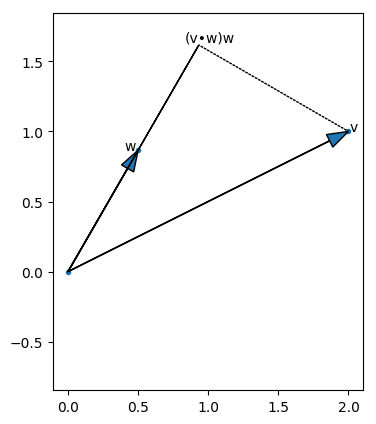

In [104]:
v = [2, 1]
w = [math.sqrt(.25), math.sqrt(.75)]
c = dot(v, w)
vonw = scalar_multiply(c, w)
o = [0,0]
plt.figure(figsize=(4, 5), dpi = 100)

plt.arrow(0, 0, v[0], v[1],
          width=0.002, head_width=.1, length_includes_head=True)
plt.annotate("v", v, xytext=[v[0] + 0.01, v[1]])

plt.arrow(0 ,0, w[0], w[1],
          width=0.002, head_width=.1, length_includes_head=True)
plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])

plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.02])

plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1],
          linestyle='dotted', length_includes_head=True)
plt.scatter(*zip(v,w,o),marker='.')
plt.axis('equal')

plt.show()